<a href="https://colab.research.google.com/github/Gayathri-S-github/Codegnan-Datascience-Materials/blob/master/FDPDS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
import datetime as dt
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Reading the data
covid = pd.read_csv("covid_19_data.csv")
covid.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [0]:
print("Size/Shape of the dataset",covid.shape)
print("Checking Null values",covid.isnull().sum())

Size/Shape of the dataset (27166, 8)
Checking Null values SNo                    0
ObservationDate        0
Province/State     14009
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [0]:
print("Checking data-type",covid.dtypes)

Checking data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [0]:
#Dropping the column
covid.drop(["SNo"],axis=1,inplace=True)
covid.isnull().sum()

ObservationDate        0
Province/State     14009
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [0]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [0]:
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
27161   2020-05-20
27162   2020-05-20
27163   2020-05-20
27164   2020-05-20
27165   2020-05-20
Name: ObservationDate, Length: 27166, dtype: datetime64[ns]

In [0]:
#Data Analysis
#Grouping different types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum",
                                                   "Recovered":"sum",
                                                   "Deaths":"sum"})

In [0]:
print("Basic Information")
print("Total number of confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])

Basic Information
Total number of confirmed cases around the world 4996472.0
Total number of Recovered cases around the world 1897466.0
Total number of Death cases around the world 328115.0


In [0]:
print("Total Number of Active Cases around the world",(datewise["Confirmed"].iloc[-1]-
                                                       datewise["Recovered"].iloc[-1]-
                                                       datewise["Deaths"].iloc[-1]))
print("Total Number of Closed Cases around the world",(datewise["Recovered"].iloc[-1]+
                                                       datewise["Deaths"].iloc[-1]))

Total Number of Active Cases around the world 2770891.0
Total Number of Closed Cases around the world 2225581.0


In [0]:
print("Number of Confirmed Cases in last 24hours",datewise["Confirmed"].iloc[-1]-
      datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours:",datewise["Recovered"].iloc[-2]-
      datewise["Recovered"].iloc[-1])
print("Number of Death Cases in last 24hours",datewise["Deaths"].iloc[-1]-
      datewise["Deaths"].iloc[-2])

Number of Confirmed Cases in last 24hours 98980.0
Number of Recovered Cases in last 24 hours: -58471.0
Number of Death Cases in last 24hours 4830.0


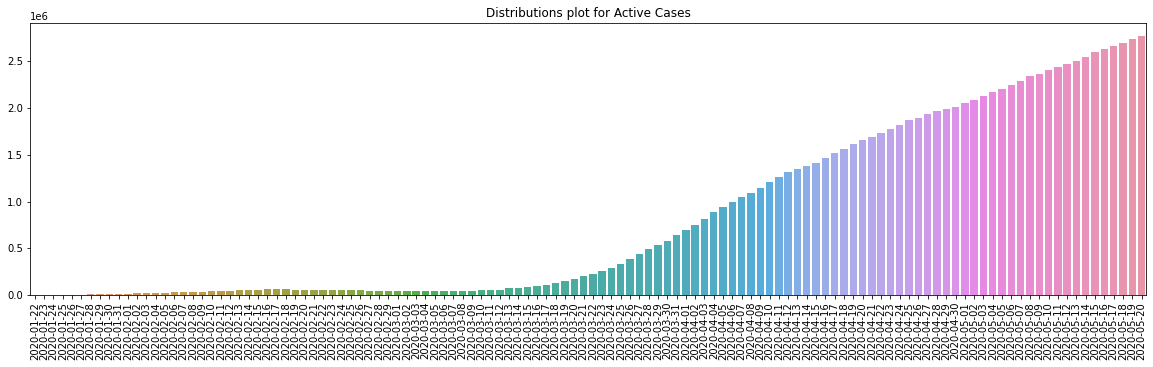

In [0]:
#Visualization 
plt.figure(figsize=(20,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)
plt.show()

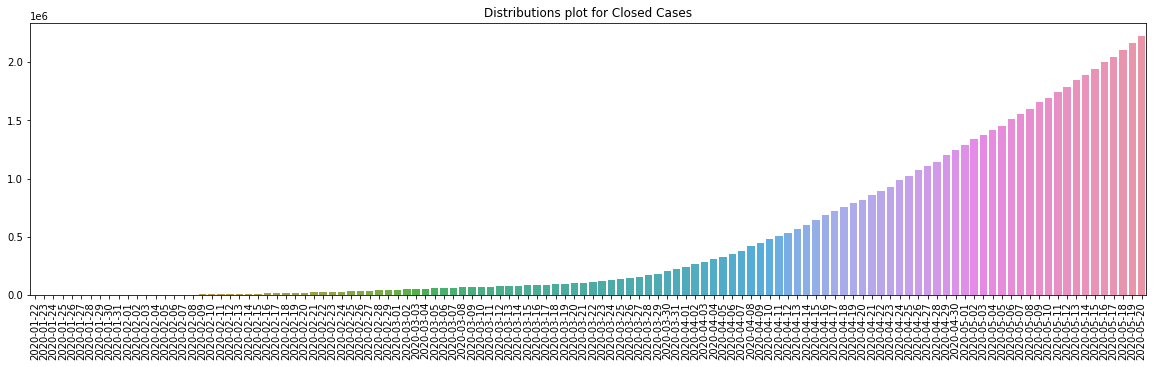

In [0]:
plt.figure(figsize=(20,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distributions plot for Closed Cases")
plt.xticks(rotation=90)
plt.show()

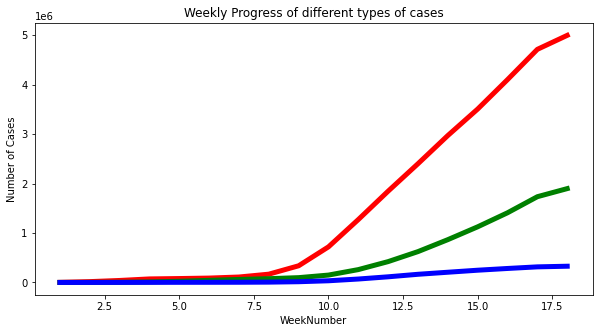

In [0]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths = []
w=1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(10,5))
plt.plot(week_num,weekwise_confirmed,'r',linewidth=5)
plt.plot(week_num,weekwise_recovered,'g',linewidth=5)
plt.plot(week_num,weekwise_deaths,'b',linewidth=5)
plt.xlabel("WeekNumber")
plt.ylabel("Number of Cases")
plt.title("Weekly Progress of different types of cases")
plt.show()

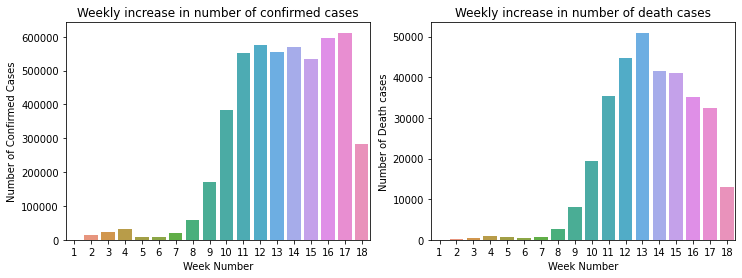

In [0]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death cases")
ax1.set_title("Weekly increase in number of confirmed cases")
ax2.set_title("Weekly increase in number of death cases")
plt.show()

In [0]:
print("Average increase in number of confirmed cases everyday:",
      np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of recovered cases everyday",
      np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of death cases everyday",
      np.round(datewise["Deaths"].diff().fillna(0).mean()))

Average increase in number of confirmed cases everyday: 41633.0
Average increase in number of recovered cases everyday 15812.0
Average increase in number of death cases everyday 2734.0


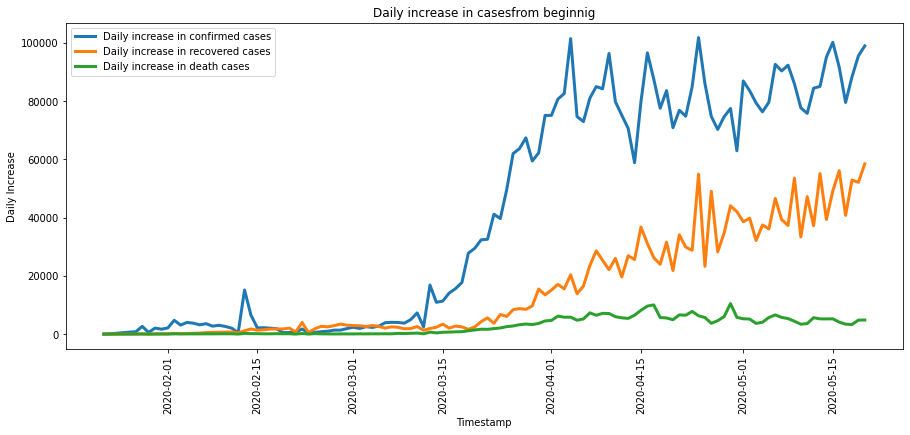

In [0]:
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increase")
plt.title("Daily increase in casesfrom beginnig")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [0]:
#Countrywise Analysis
#Calculating Country wise Mortality rate
countrywise = covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"] = (countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"] = (countrywise["Recovered"]/countrywise["Confirmed"])*100

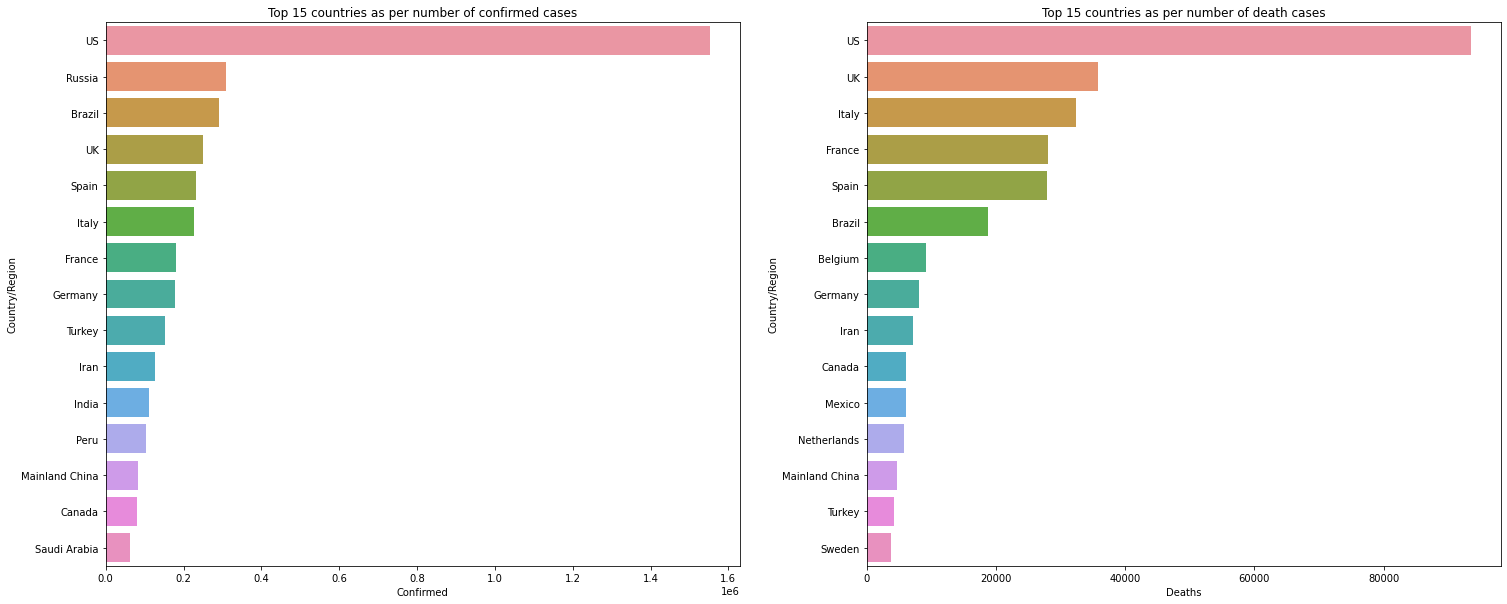

In [0]:
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per number of death cases")
plt.show()

In [0]:
#Data Analysis of INDIA
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum",
                                                   "Recovered":"sum",
                                                   "Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Number of Active Cases",datewise_india["Confirmed"].iloc[-1]-
      datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Number of Closed Cases",
      datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    112028.0
Recovered     45422.0
Deaths         3434.0
Name: 2020-05-20 00:00:00, dtype: float64
Total Number of Active Cases 63172.0
Total Number of Closed Cases 48856.0


In [0]:
#Data Analysis for US
us_data = covid[covid["Country/Region"]=="US"]
datewise_us = us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum",
                                                   "Recovered":"sum",
                                                   "Deaths":"sum"})
print(datewise_us.iloc[-1])
print("Total Number of Active Cases",datewise_us["Confirmed"].iloc[-1]-
      datewise_us["Recovered"].iloc[-1]-datewise_us["Deaths"].iloc[-1])
print("Total Number of Closed Cases",
      datewise_us["Recovered"].iloc[-1]+datewise_us["Deaths"].iloc[-1])

Confirmed    1551853.0
Recovered     294312.0
Deaths         93439.0
Name: 2020-05-20 00:00:00, dtype: float64
Total Number of Active Cases 1164102.0
Total Number of Closed Cases 387751.0


In [0]:
#Data Analysis for Italy
Italy_data = covid[covid["Country/Region"]=="Italy"]
datewise_italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum",
                                                   "Recovered":"sum",
                                                   "Deaths":"sum"})
print(datewise_italy.iloc[-1])
print("Total Number of Active Cases",datewise_italy["Confirmed"].iloc[-1]-
      datewise_italy["Recovered"].iloc[-1]-datewise_italy["Deaths"].iloc[-1])
print("Total Number of Closed Cases",
      datewise_italy["Recovered"].iloc[-1]+datewise_italy["Deaths"].iloc[-1])

Confirmed    227364.0
Recovered    132282.0
Deaths        32330.0
Name: 2020-05-20 00:00:00, dtype: float64
Total Number of Active Cases 62752.0
Total Number of Closed Cases 164612.0


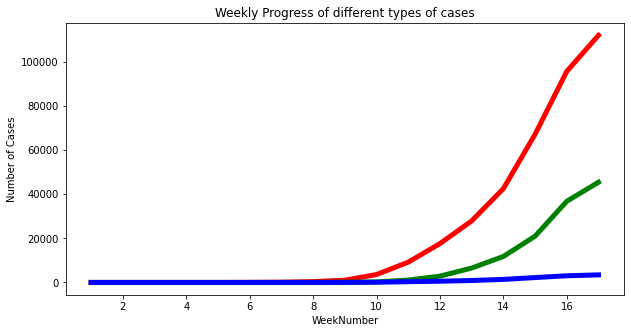

In [0]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths = []
w=1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(10,5))
plt.plot(week_num_india,india_weekwise_confirmed,'r',linewidth=5)
plt.plot(week_num_india,india_weekwise_recovered,'g',linewidth=5)
plt.plot(week_num_india,india_weekwise_deaths,'b',linewidth=5)
plt.xlabel("WeekNumber")
plt.ylabel("Number of Cases")
plt.title("Weekly Progress of different types of cases")
plt.show()

In [0]:
max_ind = datewise_india["Confirmed"].max()
print("It took",datewise_italy[(datewise_italy["Confirmed"]>0)&(datewise_italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of confirmed cases equivalent to India")
print("It took",datewise_us[(datewise_us["Confirmed"]>0)&(datewise_us["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of confirmed cases equivalent to India")
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed cases")

It took 62 days in Italy to reach number of confirmed cases equivalent to India
It took 66 days in US to reach number of confirmed cases equivalent to India
It took 112 days in India to reach 112028.0 Confirmed cases


In [0]:
#Import the Libraries and apply our Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [0]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [0]:
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores = []

In [0]:
lin_reg = LinearRegression(normalize=True)

In [0]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),
            np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
prediction_valid_linreg= lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [0]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("RMS for LR",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

RMS for LR 1366153.185485333


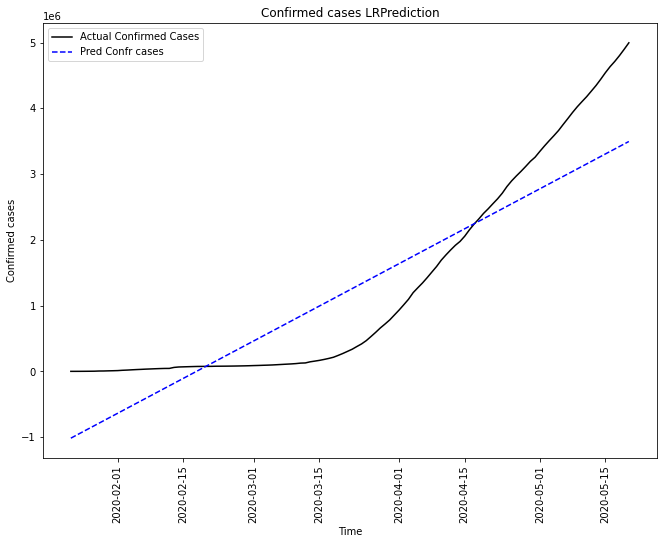

In [0]:
plt.figure(figsize=(11,8))
prediction_linreg = lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases",color='black')
plt.plot(datewise.index,prediction_linreg,linestyle='--',label="Pred Confr cases",color='b')
plt.xlabel("Time")
plt.ylabel("Confirmed cases")
plt.title("Confirmed cases LRPrediction")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [0]:
poly = PolynomialFeatures(degree= 8)

In [0]:
train_poly = poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly = poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y = train_ml["Confirmed"]

In [0]:
linreg = LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
prediction_poly = linreg.predict(valid_poly)
rmse_poly = np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("RMS For PR",rmse_poly)

RMS For PR 53262.68274761107


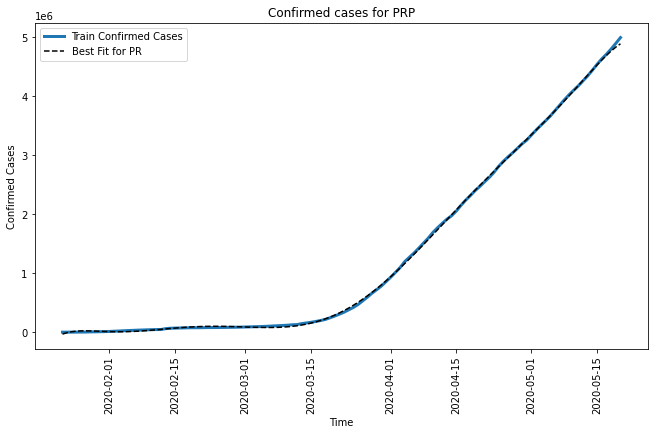

In [0]:
comp_data = poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly = linreg.predict(comp_data)
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth = 3)
plt.plot(datewise.index,predictions_poly,linestyle='--',label="Best Fit for PR",color="black")
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed cases for PRP")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [0]:
new_date=[]
new_prediction_lr=[]
new_prediction_poly=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_date_poly = poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

In [0]:
pd.set_option('display.float_format',lambda x:'%.f' %x)
model_predictions = pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly),
                                 columns=["Dates","LRP","PRP"])
model_predictions.head(5)

,Dates,LRP,PRP
0,2020-05-21,3533760,4937018
1,2020-05-22,3571669,4967582
2,2020-05-23,3609578,4980051
3,2020-05-24,3647487,4970644
4,2020-05-25,3685396,4935063


In [0]:
model_train = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid = datewise.iloc[int(datewise.shape[0]*0.95):]

In [0]:
from statsmodels.tsa.api import Holt
holt = Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.3,
                                                     smoothing_slope=0.5,optimized=False)
y_pred=valid.copy()

In [0]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("RMSE",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

RMSE 30910.12119085982


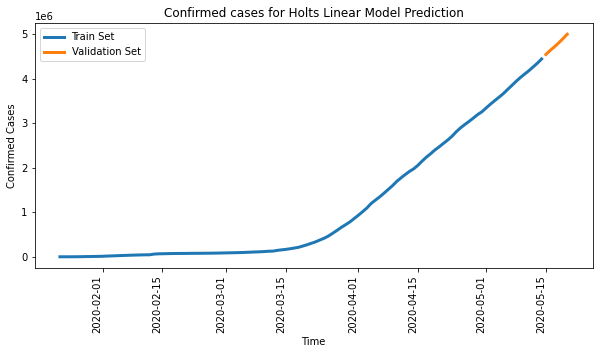

In [0]:
plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",linewidth = 3)
valid.Confirmed.plot(label="Validation Set",linewidth = 3)
#y_pred.Holt.plot(label ="Holt Model",linewidth = 3)
plt.xlabel("Time")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed cases for Holts Linear Model Prediction")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [0]:
holt_new_date = []
holt_new_predictions =[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_predictions.append(holt.forecast((len(valid)+i))[-1])
model_predictions["Holts Model"] = holt_new_predictions
model_predictions.head()

,Dates,LRP,PRP,Holts Model
0,2020-05-21,3533760,4937018,5031221
1,2020-05-22,3571669,4967582,5115759
2,2020-05-23,3609578,4980051,5200298
3,2020-05-24,3647487,4970644,5284836
4,2020-05-25,3685396,4935063,5369375
